# Aplicación del Algoritmo Discriminante Lineal (LDA) para Clasificar Estrellas
Este notebook utiliza el dataset de estrellas para entrenar un modelo con el algoritmo de Análisis Discriminante Lineal (LDA) y evaluar su desempeño mediante una matriz de confusión.

El dataset contiene características físicas de estrellas y la clasificación por tipo de estrella.

In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Cargar el Dataset
Cargamos el dataset que contiene información sobre diferentes tipos de estrellas.

In [3]:
# Cargar el dataset
data = pd.read_csv('../csv/estrella.csv')
data.head()  # Mostrar las primeras filas del dataset

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [15]:
data.dtypes

Temperature (K)             int64
Luminosity(L/Lo)          float64
Radius(R/Ro)              float64
Absolute magnitude(Mv)    float64
Star type                   int64
Star color                 object
Spectral Class             object
dtype: object

## Preprocesamiento
Separaremos las características independientes (`X`) de la variable objetivo (`y`), que indica el tipo de estrella.

In [4]:
# Separar las variables independientes y dependientes
X = data[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']]
y = data['Star type']

## División del Conjunto de Datos
Dividimos los datos en un conjunto de entrenamiento y un conjunto de prueba utilizando un 70% para el entrenamiento y un 30% para las pruebas.

In [5]:
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Entrenamiento del Modelo LDA
Entrenamos el modelo de Análisis Discriminante Lineal (LDA) con el conjunto de entrenamiento.

In [6]:
# Crear y entrenar el modelo LDA
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

## Evaluación del Modelo
Realizamos predicciones en el conjunto de prueba y generamos la matriz de confusión para evaluar el desempeño del modelo.

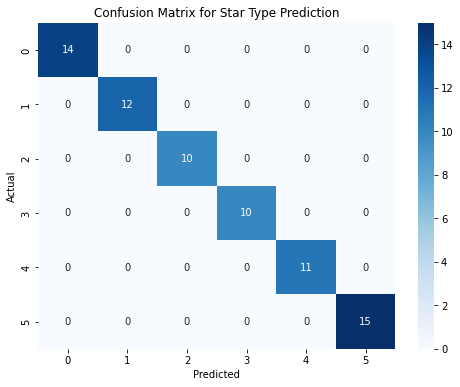

In [7]:
# Realizar predicciones y generar la matriz de confusión
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Star Type Prediction')
plt.show()

## Informe de Clasificación
Además de la matriz de confusión, generamos un informe de clasificación que incluye precisión, recall y F1-score.

In [8]:
# Mostrar el informe de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        15

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



## Visualización de la Proyección LDA
El algoritmo LDA puede reducir las dimensiones del conjunto de datos. Aquí visualizamos la proyección en el primer componente discriminante para observar cómo se distribuyen las clases.

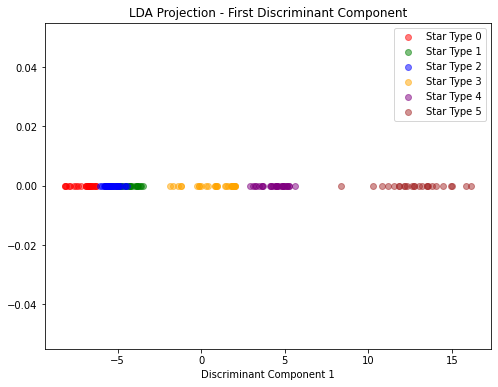

In [9]:
# Reducir las dimensiones con LDA y visualizar la proyección
X_lda = model.transform(X_train)
plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown']
for i, color in zip(np.unique(y_train), colors):
    plt.scatter(X_lda[y_train == i, 0], np.zeros_like(X_lda[y_train == i, 0]), 
                color=color, alpha=0.5, label=f'Star Type {i}')
plt.title('LDA Projection - First Discriminant Component')
plt.xlabel('Discriminant Component 1')
plt.legend(loc='best')
plt.show()

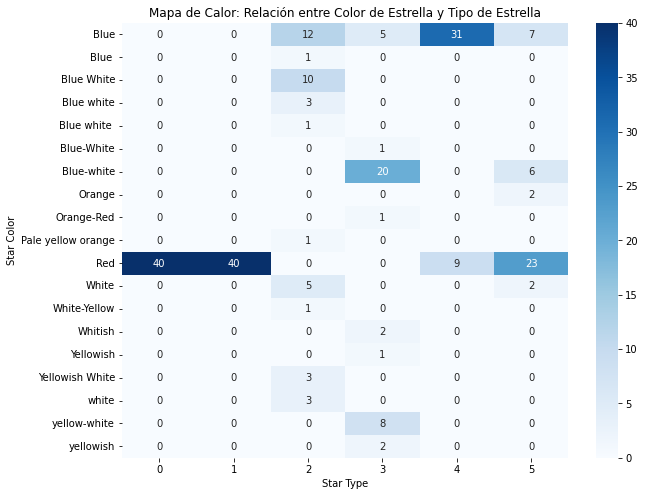

In [11]:
## Análisis de Correlación entre 'Star color' y 'Star type'
# A continuación, se analiza la relación entre el color de la estrella y el tipo de estrella, 
# utilizando un mapa de calor para visualizar la correlación entre ambas variables.

# Crear un mapa de calor para observar la correlación entre 'Star color' y 'Star type'
color_vs_type_updated = pd.crosstab(data['Star color'], data['Star type'])

# Generar un mapa de calor basado en la tabla de contingencia
plt.figure(figsize=(10, 8))
sns.heatmap(color_vs_type_updated, annot=True, cmap='Blues', fmt='d')
plt.title('Mapa de Calor: Relación entre Color de Estrella y Tipo de Estrella')
plt.xlabel('Star Type')
plt.ylabel('Star Color')
plt.show()


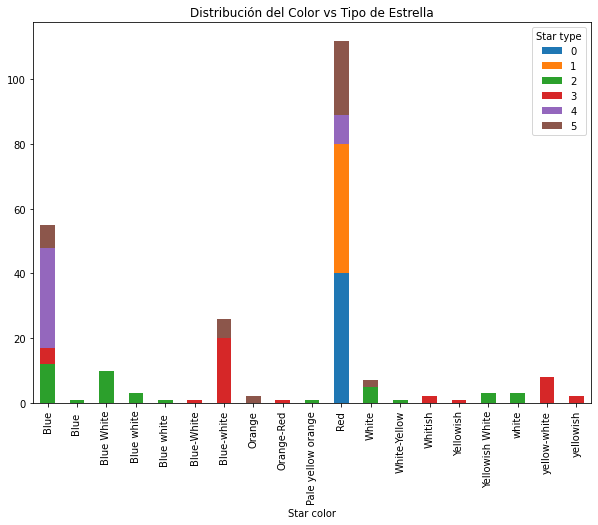

In [12]:
# Ver la relación entre 'Star color' y 'Star type'
color_vs_type = data.groupby(['Star color', 'Star type']).size().unstack(fill_value=0)

# Ver si cada color tiene asignado un único tipo de estrella
color_vs_type.plot(kind='bar', stacked=True, figsize=(10,7))
plt.title("Distribución del Color vs Tipo de Estrella")
plt.show()


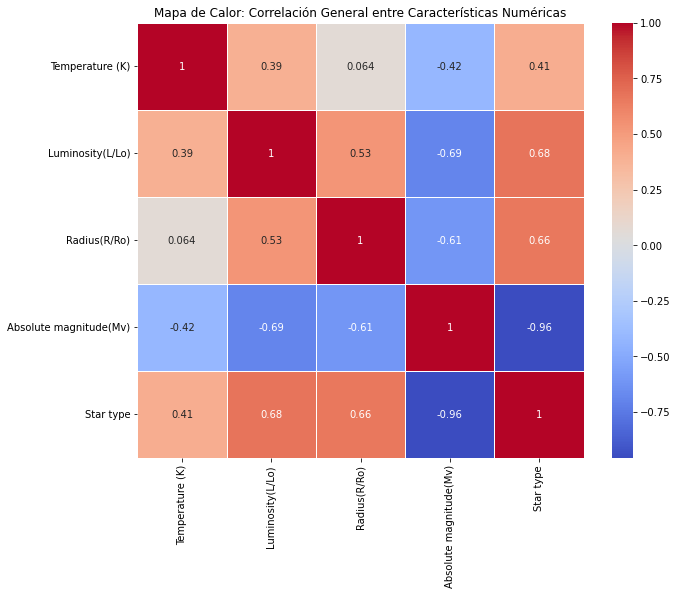

In [14]:
# Mapa de Calor: Correlación General entre Características Numéricas

# Crear un mapa de calor para mostrar la correlación general entre las columnas numéricas del dataset
plt.figure(figsize=(10, 8))

# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Generar el mapa de calor basado en la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor: Correlación General entre Características Numéricas")
plt.show()
